# ResNet18 Model - Transfer Learning

### Imports

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from torchvision.models import resnet18, ResNet18_Weights
from utils import data, eval, train

### Initialize Dataset

In [2]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
SAVE_MODEL_FILE = 'models/resnet.pt'
SEED = 0
NUM_SAMPLES = 10000
DATASET_SPLIT = [0.4, 0.3, 0.3] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 10
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-4

In [3]:
# Seed PyTorch
torch.manual_seed(SEED)

# Image transforms
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader, test_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [4]:
# Instantiate model and move to GPU if available
model = torchvision.models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model = model.to(device)

# Print model details
from torchsummary import summary
summary(model, input_size=(3, IMAGE_SIZE[0], IMAGE_SIZE[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           9,408
       BatchNorm2d-2           [-1, 64, 50, 50]             128
              ReLU-3           [-1, 64, 50, 50]               0
         MaxPool2d-4           [-1, 64, 25, 25]               0
            Conv2d-5           [-1, 64, 25, 25]          36,864
       BatchNorm2d-6           [-1, 64, 25, 25]             128
              ReLU-7           [-1, 64, 25, 25]               0
            Conv2d-8           [-1, 64, 25, 25]          36,864
       BatchNorm2d-9           [-1, 64, 25, 25]             128
             ReLU-10           [-1, 64, 25, 25]               0
       BasicBlock-11           [-1, 64, 25, 25]               0
           Conv2d-12           [-1, 64, 25, 25]          36,864
      BatchNorm2d-13           [-1, 64, 25, 25]             128
             ReLU-14           [-1, 64,

### Training

In [5]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY, conv=True)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Epoch 1 | Loss = 0.2777 | Train Accuracy = 92.10% | Valid Accuracy = 89.00% | Time = 0:00:33
Epoch 2 | Loss = 0.0296 | Train Accuracy = 99.08% | Valid Accuracy = 97.10% | Time = 0:00:29
Epoch 3 | Loss = 0.0524 | Train Accuracy = 98.50% | Valid Accuracy = 96.07% | Time = 0:00:29
Epoch 4 | Loss = 0.0433 | Train Accuracy = 99.42% | Valid Accuracy = 97.63% | Time = 0:00:28
Epoch 5 | Loss = 0.0643 | Train Accuracy = 98.17% | Valid Accuracy = 96.33% | Time = 0:00:28
Epoch 6 | Loss = 0.0245 | Train Accuracy = 99.20% | Valid Accuracy = 97.03% | Time = 0:00:28
Epoch 7 | Loss = 0.1115 | Train Accuracy = 96.88% | Valid Accuracy = 94.90% | Time = 0:00:29
Epoch 8 | Loss = 0.1961 | Train Accuracy = 94.65% | Valid Accuracy = 92.13% | Time = 0:00:28
Epoch 9 | Loss = 0.0433 | Train Accuracy = 98.90% | Valid Accuracy = 97.00% | Time = 0:00:28
Epoch 10 | Loss = 0.0068 | Train Accuracy = 99.80% | Valid Accuracy = 98.90% | Time = 0:00:28


### Evaluation

Final Train Accuracy = 99.80%
Final Valid Accuracy  = 98.90%
Average Epoch Time   = 29.27s


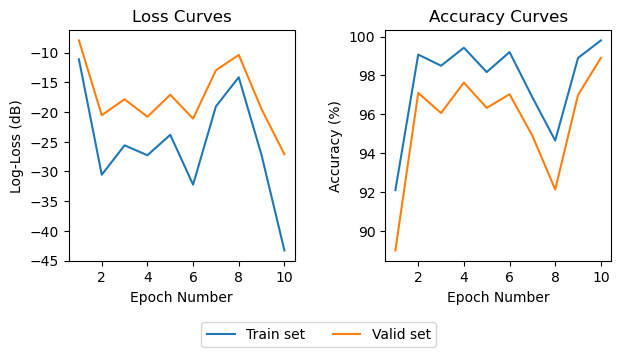

In [5]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.9850
Recall = 0.9847
F1 = 0.9847
Accuracy = 98.47 %


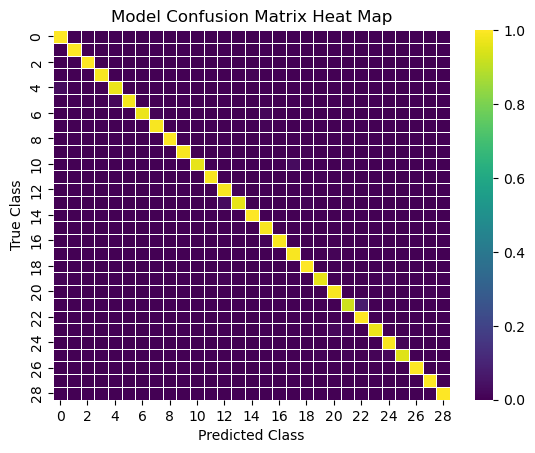

In [7]:
eval_metrics = eval.eval_model(model, test_loader, device, conv=True)